# Linear Regression

algorithm

    - y = mx + c 
    - finding m
        - first pick random
        - by n iteration pick M which is suitable
            - M = m + Δm
            - Δm = derivation(y(predict)-y(actual))*learning rate
        - now you have your m(coef)
    - finding c
        - first pick random
        - by n iteration pick C which is suitable
            - C = c + Δc
            - Δc = derivation(y(predict)-y(actual))*learning rate
        - now you have your c(intercept)
    - calculate y
        - y = mx + c 
        - you have m , c and x as feature so calculate y
        

In [8]:
# importing lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [75]:
# main model class
class Linear_regression:
    #initializing learning rate
    #by default it is 0.1
    def __init__(self,lr=0.1):
        self.lr = lr
    #in this function actual m and c calculating here
    def fit(self,features,lables):
        self.features = features
        self.lables = lables.reshape(-1,1) 
        
        #first initializing m and c randomly
        self.M = np.random.random()
        self.C = np.random.random()
        
        
        error=[]
        #you can do as many iteration you can here there is 50
        for i in range(150):
            #update gredient descent and append the error 
            self.gredient_descent()
            error.append(self.error())
        return error
        
    def gredient_descent(self):
        #update value of M and C  
        delta_m,delta_c = self.gredient()
        self.M -= delta_m*self.lr
        self.C -= delta_c*self.lr
    
    def gredient(self):
        #Find the Δm and Δc here
        delta_m = ((self.predict(self.features) - self.lables)*self.features).mean()
        delta_c = (self.predict(self.features)-self.lables).mean()
        return delta_m,delta_c

    def predict(self,X):
        #predict the given features by applying simple formula
        return (self.M*X)+self.C
    
    def error(self):
        #calculating error
        return ((self.predict(self.features)-self.lables)**2).sum()

In [84]:
# building model
model = Linear_regression()

In [85]:
# extracting data
bias =100
features,labels= make_regression(n_features=1, noise=10, bias=bias, random_state=42)

In [78]:
# 
error= model.fit(features,labels)

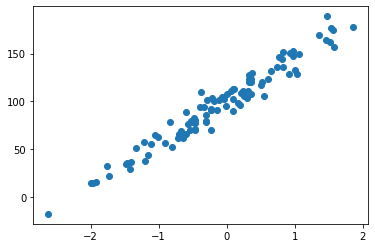

In [79]:
plt.scatter(features,labels)

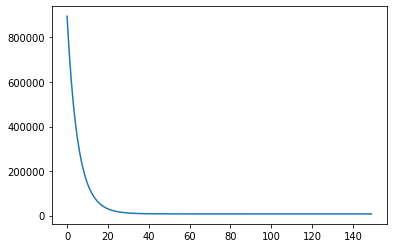

In [80]:
plt.plot(error)

In [81]:
model.M

44.43678244018426

In [82]:
model.C

101.16492868827815

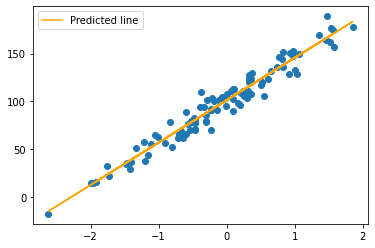

In [83]:
plt.scatter(features,labels)
plt.plot(features,model.predict(features),label="Predicted line",color="orange")
plt.legend()